# Lecture 07

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('colorblind')

In [2]:
from sklearn import metrics, datasets

## K-mean clustering

In [3]:
from sklearn.cluster import KMeans

In [4]:
data = datasets.load_iris(as_frame=True)
df = data['frame']
print(data['DESCR'])
display(df.info(), df.sample(10))

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

None

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
129,7.2,3.0,5.8,1.6,2
86,6.7,3.1,4.7,1.5,1
19,5.1,3.8,1.5,0.3,0
13,4.3,3.0,1.1,0.1,0
127,6.1,3.0,4.9,1.8,2
91,6.1,3.0,4.6,1.4,1
115,6.4,3.2,5.3,2.3,2
140,6.7,3.1,5.6,2.4,2
122,7.7,2.8,6.7,2.0,2
3,4.6,3.1,1.5,0.2,0


In [5]:
X, y = df[['petal length (cm)', 'petal width (cm)']], df['target']

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

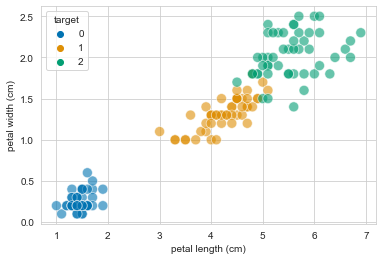

In [6]:
sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y,
    s=100, alpha=0.6, palette='colorblind'
)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

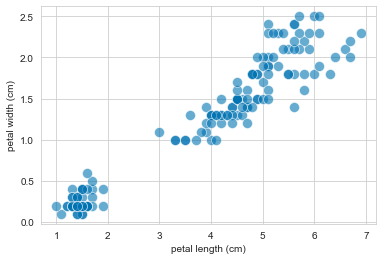

In [ ]:
sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)',
    s=100, alpha=0.6, palette='colorblind'
)

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [ ]:
display(y_pred, y.values)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
value_map = {1: 0, 2: 1, 0: 2}
y_pred = np.array([value_map[i] for i in y_pred])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0.5, 1.0, 'Actual')

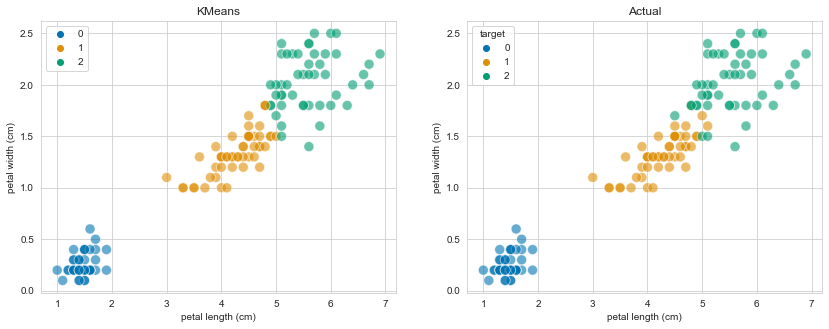

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y_pred,
    s=100, alpha=0.6, palette='colorblind', ax=axs[0]
)
ax.set_title('KMeans')

ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y,
    s=100, alpha=0.6, palette='colorblind', ax=axs[1]
)
ax.set_title('Actual')

In [ ]:
metrics.accuracy_score(y, y_pred)*100

96.0

### Clusters Centers

In [ ]:
kmeans.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

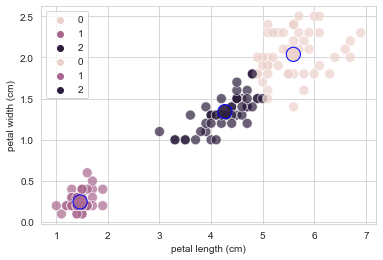

In [ ]:
ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=kmeans.labels_,
    s=100, alpha=0.7
)

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], hue=np.arange(0, 3),
    s=200, alpha=0.9, ax=ax, edgecolor='b'
)

### How does it work?

![](https://cdn-images-1.medium.com/max/800/1*ZrwEraj9S-u_KOWdKWc8sQ.png)

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

n_clusters = 3


In [ ]:
first_guess = X.sample(n_clusters)
first_guess['target'] = np.arange(0, n_clusters)
first_guess

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
135,6.1,2.3,1
79,3.5,1.0,2


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

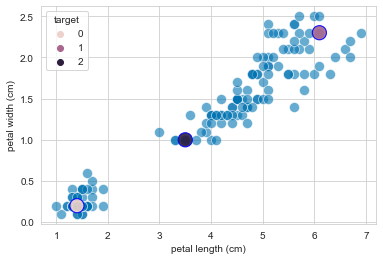

In [ ]:
ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)',
    s=100, alpha=0.6
)

sns.scatterplot(
    data=first_guess, x='petal length (cm)', y='petal width (cm)', hue='target',
    s=200, alpha=0.9, ax=ax, edgecolor='b'
)

In [ ]:
pairwise_distances_argmin(X, first_guess.iloc[:, :2])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
y_pred = pairwise_distances_argmin(X, first_guess.iloc[:, :2])

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

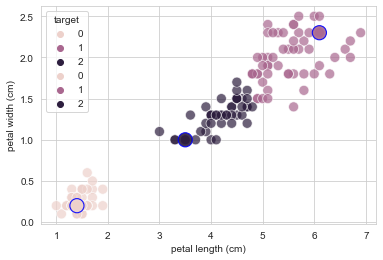

In [ ]:
ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y_pred,
    s=100, alpha=0.7
)

sns.scatterplot(
    data=first_guess, x='petal length (cm)', y='petal width (cm)', hue='target',
    s=200, alpha=0.9, ax=ax, edgecolor='b'
)

In [ ]:
cluster_centers = X.groupby(y_pred).mean()
cluster_centers

,petal length (cm),petal width (cm)
0,1.462000,0.246000
1,5.514815,1.994444
2,4.191304,1.302174


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

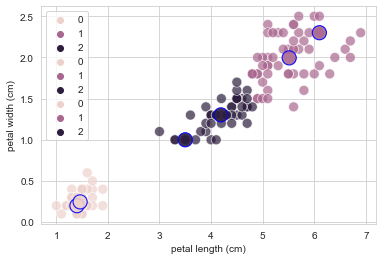

In [ ]:
ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y_pred,
    s=100, alpha=0.7
)

sns.scatterplot(
    data=first_guess, x='petal length (cm)', y='petal width (cm)', hue='target',
    s=200, alpha=0.9, ax=ax, edgecolor='b'
)

sns.scatterplot(
    data=cluster_centers, x='petal length (cm)', y='petal width (cm)', hue=cluster_centers.index,
    s=200, alpha=0.9, ax=ax, edgecolor='b'
)

### Finding optimal K

In [ ]:
kmeans.inertia_ # sum of distances: tối ưu là sum thấp nhất, số lg nhóm tối ưu là điểm giữa tiếp tuyến và đường cong khoảng cách - số lượng nhóm, khi tăng slg nhóm lên thì khoảng cách ko giảm đáng kể.

31.371358974358966

In [ ]:
sse= []

for i in range(1, 6):
    km = KMeans(n_clusters=i)
    km.fit(X)
    sse.append((i, km.inertia_))
sse = np.array(sse)
sse

array([[  1.        , 550.89533333],
       [  2.        ,  86.39021985],
       [  3.        ,  31.37135897],
       [  4.        ,  19.47712336],
       [  5.        ,  13.91690876]])

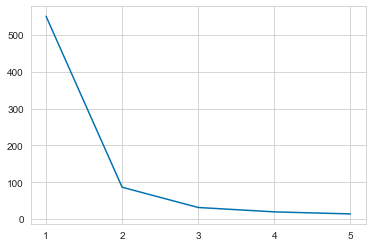

In [ ]:
fig = plt.figure()
plt.xticks(sse[:, 0])
plt.plot(sse[:, 0], sse[:, 1])

In [ ]:
plt.xticks()

In [ ]:
#Với bộ DL wine, gộp nhóm 0 và 1 thành 1 loại, sử dụng 1 trong các thuât toán đã học để XD mô hình, cross validate 30 lần, sử dụng GridSearch để tối ưu tham số.

## Hierarchical Clustering

### Agglomerative vs Divisive

![](https://media.geeksforgeeks.org/wp-content/uploads/20200204181551/Untitled-Diagram71.png)

![](https://media.geeksforgeeks.org/wp-content/uploads/20200204181916/Untitled-Diagram-153-1.png)

In [7]:
from sklearn.cluster import AgglomerativeClustering # 2 thuật toán này cơ bản dựa trên khoảng cách giữa các điểm.

ward = AgglomerativeClustering(n_clusters=3)
y_pred = ward.fit_predict(X) # vừa train và predict

In [8]:
display(y_pred, y.values)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
value_map = {1: 0, 2: 1, 0: 2}
y_pred = np.array([value_map[i] for i in y_pred])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0.5, 1.0, 'Actual')

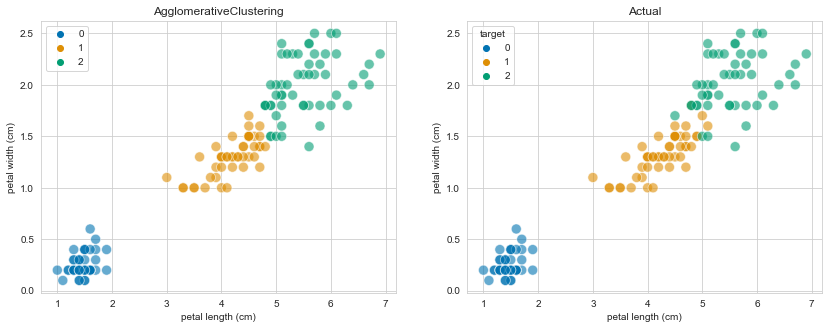

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y_pred,
    s=100, alpha=0.6, palette='colorblind', ax=axs[0]
)
ax.set_title('AgglomerativeClustering')

ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y,
    s=100, alpha=0.6, palette='colorblind', ax=axs[1]
)
ax.set_title('Actual')

In [11]:
metrics.accuracy_score(y, y_pred)*100

96.0

In [13]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


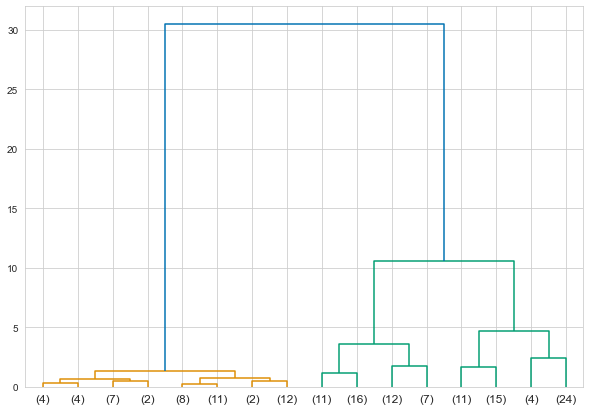

In [14]:
ward = AgglomerativeClustering(compute_distances=True, n_clusters=3)
ward.fit(X)

fig = plt.figure(figsize=(10, 7))
plot_dendrogram(ward, truncate_mode='level', p=3)

## Gausian Mixture

In [15]:
from sklearn.mixture import GaussianMixture # trên cơ sở các phân phối, giả định phân phối bao gồm nhiều phân phối Gaussian (nhiều cluster). Khoảng cách đc tính trên cơ sở std, điểm nào gần mean của cụm gần hơn về a.std thì phân loại vào cụm đó.

gnm = GaussianMixture(n_components=3)
gnm.fit(X)
y_pred = gnm.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
value_map = {1: 0, 2: 2, 0: 1}
y_pred = np.array([value_map[i] for i in y_pred])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0.5, 1.0, 'Actual')

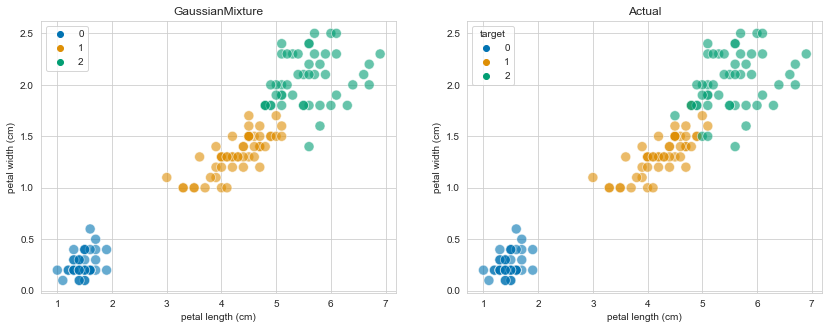

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y_pred,
    s=100, alpha=0.6, palette='colorblind', ax=axs[0]
)
ax.set_title('GaussianMixture')

ax = sns.scatterplot(
    data=X, x='petal length (cm)', y='petal width (cm)', hue=y,
    s=100, alpha=0.6, palette='colorblind', ax=axs[1]
)
ax.set_title('Actual')

In [26]:
metrics.accuracy_score(y, y_pred)*100

97.33333333333334

In [ ]:
gnm.predict_proba(X)[:20, :]

array([[1.64582608e-20, 9.99999989e-01, 1.06217066e-08],
       [1.64582608e-20, 9.99999989e-01, 1.06217066e-08],
       [6.85934072e-21, 9.99999995e-01, 5.48414102e-09],
       [5.56684268e-20, 9.99999973e-01, 2.69053509e-08],
       [1.64582608e-20, 9.99999989e-01, 1.06217066e-08],
       [9.12040287e-17, 9.99998403e-01, 1.59721304e-06],
       [1.33317921e-19, 9.99999983e-01, 1.73889970e-08],
       [5.56684268e-20, 9.99999973e-01, 2.69053509e-08],
       [1.64582608e-20, 9.99999989e-01, 1.06217066e-08],
       [2.00166023e-20, 9.99999973e-01, 2.65831387e-08],
       [5.56684268e-20, 9.99999973e-01, 2.69053509e-08],
       [2.65434509e-19, 9.99999911e-01, 8.91336466e-08],
       [4.90173314e-21, 9.99999990e-01, 1.04241519e-08],
       [5.64895674e-22, 9.99999997e-01, 3.14554699e-09],
       [4.02999269e-21, 9.99999996e-01, 3.70323778e-09],
       [6.04584548e-18, 9.99999886e-01, 1.14309786e-07],
       [1.58268050e-18, 9.99999976e-01, 2.39352556e-08],
       [1.33317921e-19, 9.99999

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gnm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=10, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

C:\Users\thang\anaconda3\envs\thuynm1\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"


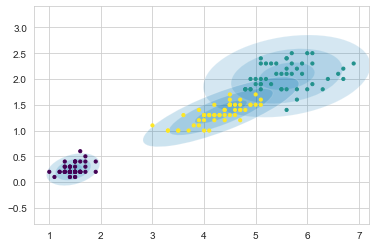

In [ ]:
plot_gnm(gnm, X.values)

## DBSCAN

## PCA

## Spectral Clustering